# We will understand the data provided in the training set file. And try to make sense of the columns provided there.

In [ ]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings


In [ ]:
# EDA

train_data = pd.read_csv('/content/train_set.csv')

train_data.head()

# train_data.info()

# train_data.describe()

# train_data.isnull().sum()




,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,84094,23943,5,Leonoray,18.0,84355102.0,Journalist,70260.20,5564.016667,9.0,...,Bad,2228.79,25.308445,217.0,Yes,246.378645,99.939577,Low_spent_Small_value_payments,78.800397,Poor
1,46702,29066,5,Osamua,21.0,981149909.0,Teacher,18001.59,1258.132500,7.0,...,Bad,2225.58,32.088726,240.0,NM,24.986447,45.523998,Low_spent_Small_value_payments,343.581411,Poor
2,147514,8183,5,Benf,47.0,324295086.0,Developer,9824.31,707.692500,7.0,...,Standard,1233.96,25.500503,227.0,No,0.000000,22.006889,Low_spent_Medium_value_payments,322.170689,Good
3,16675,27938,2,Matt Falloonm,41.0,564682345.0,Entrepreneur,87481.62,7022.135000,0.0,...,Good,214.43,38.505066,282.0,No,55.653369,56.550721,High_spent_Medium_value_payments,726.849284,Standard
4,84080,38740,3,Seetharamank,53.0,228116416.0,Manager,129204.92,10508.076667,5.0,...,Standard,1075.37,38.359175,289.0,Yes,277.610885,165.019535,High_spent_Large_value_payments,742.018547,Standard


In [ ]:
# drop irrelevant columns
columns_to_drop = ['ID','Customer_ID','Name','SSN', "Month"]

train_data_r = train_data.drop(columns = columns_to_drop)
score_mapping = {'Poor': -1, 'Standard': 0, 'Good': 1}

train_data_r['Credit_Score'] = train_data_r['Credit_Score'].map(score_mapping)


train_data_r.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,18.0,Journalist,70260.20,5564.016667,9.0,7.0,20.0,5.0,"payday loan,mortgage loan,student loan,not spe...",60.0,...,Bad,2228.79,25.308445,217.0,Yes,246.378645,99.939577,Low_spent_Small_value_payments,78.800397,-1
1,21.0,Teacher,18001.59,1258.132500,7.0,9.0,31.0,2.0,"credit-builder loan,mortgage loan",20.0,...,Bad,2225.58,32.088726,240.0,NM,24.986447,45.523998,Low_spent_Small_value_payments,343.581411,-1
2,47.0,Developer,9824.31,707.692500,7.0,4.0,17.0,0.0,No Data,24.0,...,Standard,1233.96,25.500503,227.0,No,0.000000,22.006889,Low_spent_Medium_value_payments,322.170689,1
3,41.0,Entrepreneur,87481.62,7022.135000,0.0,4.0,3.0,1.0,credit-builder loan,14.0,...,Good,214.43,38.505066,282.0,No,55.653369,56.550721,High_spent_Medium_value_payments,726.849284,0
4,53.0,Manager,129204.92,10508.076667,5.0,6.0,12.0,4.0,"personal loan,credit-builder loan,auto loan,pa...",8.0,...,Standard,1075.37,38.359175,289.0,Yes,277.610885,165.019535,High_spent_Large_value_payments,742.018547,0


['Journalist' 'Teacher' 'Developer' 'Entrepreneur' 'Manager' 'Architect'
 'Media_Manager' 'Mechanic' 'Doctor' 'Scientist' 'Accountant' 'Musician'
 'Writer' 'Lawyer' 'Engineer']
Lawyer           4887
Architect        4807
Engineer         4790
Mechanic         4772
Developer        4767
Accountant       4742
Scientist        4704
Media_Manager    4692
Teacher          4622
Entrepreneur     4618
Journalist       4588
Doctor           4557
Manager          4501
Musician         4482
Writer           4471
Name: Occupation, dtype: int64


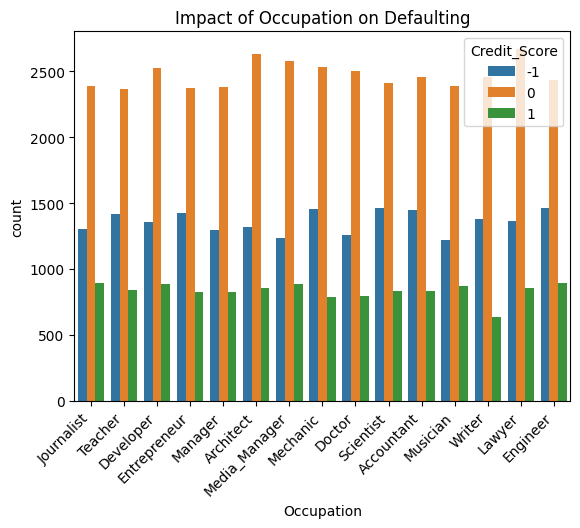

Occupation
Accountant      -0.129692
Architect       -0.096526
Developer       -0.100063
Doctor          -0.100505
Engineer        -0.119415
Entrepreneur    -0.129710
Journalist      -0.088710
Lawyer          -0.104972
Manager         -0.103310
Mechanic        -0.139564
Media_Manager   -0.073956
Musician        -0.077644
Scientist       -0.134354
Teacher         -0.123540
Writer          -0.166406
Name: Credit_Score, dtype: float64


In [ ]:
# plot the distribution for each column

unique_occupations = train_data_r['Occupation'].unique()
print(unique_occupations)

occupation_counts = train_data_r['Occupation'].value_counts()
print(occupation_counts)

sns.countplot(x='Occupation', hue='Credit_Score', data=train_data_r)
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility if needed
plt.title('Impact of Occupation on Defaulting')
plt.show()

occupation_default_rates = train_data_r.groupby('Occupation')['Credit_Score'].mean()
print(occupation_default_rates)



#### Looking at the data it seems that occupation column does not provide any useful information.

In [ ]:
# The data in the Occupation column does not seem to be very useful.
# train_data_r = train_data_r.drop(columns = ['Occupation'])
columns_to_drop.append('Occupation')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Type_of_Loan' and 'Credit_Score' are columns in your DataFrame
# Replace these with the actual column names in your DataFrame
train_data_r['Type_of_Loan'] = train_data_r['Type_of_Loan'].astype(str)  # Ensure the column is of string type

type_of_loan = {}
for row_index, row in train_data_r.iterrows():
    value = row['Type_of_Loan']
    loans = [loan.strip() for loan in value.split(",")]
    for loan in loans:
        loan = loan.replace(r'\s+', "")
        if loan.lower() in ['nan', 'no data', 'not specified']:
            continue
        if loan not in type_of_loan:
            type_of_loan[loan] = 0
        type_of_loan[loan] += 1

print(type_of_loan)


{'payday loan': 28405, 'mortgage loan': 27296, 'student loan': 27261, 'home equity loan': 27259, 'credit-builder loan': 28418, 'personal loan': 27250, 'auto loan': 26486, 'debt consolidation loan': 27054}


In [ ]:
import pandas as pd

# Assuming 'Type_of_Loan' and 'Credit_Score' are columns in your DataFrame
# Replace these with the actual column names in your DataFrame
train_data_r['Type_of_Loan'] = train_data_r['Type_of_Loan'].astype(str)  # Ensure the column is of string type

# Filter out rows with 'No Data', 'NaN', and 'not specified' loan types
filtered_data = train_data_r[~train_data_r['Type_of_Loan'].str.lower().isin(['no data', 'nan', 'not specified'])]

# Split the 'Type_of_Loan' column into separate columns for each loan type
loan_dummies = filtered_data['Type_of_Loan'].str.get_dummies(sep=',')

# Concatenate the one-hot-encoded loan columns with the original DataFrame
train_data_r_encoded = pd.concat([filtered_data, loan_dummies], axis=1)
train_data_r_encoded = train_data_r_encoded.drop(columns = ['Type_of_Loan'])


# Display the resulting DataFrame
print(train_data_r_encoded.head())


    Age    Occupation  Annual_Income  Monthly_Inhand_Salary  \
0  18.0    Journalist       70260.20            5564.016667   
1  21.0       Teacher       18001.59            1258.132500   
3  41.0  Entrepreneur       87481.62            7022.135000   
4  53.0       Manager      129204.92           10508.076667   
5  30.0     Architect       31517.47            2484.455833   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                9.0              7.0           20.0          5.0   
1                7.0              9.0           31.0          2.0   
3                0.0              4.0            3.0          1.0   
4                5.0              6.0           12.0          4.0   
5                7.0              3.0            5.0          4.0   

   Delay_from_due_date  Num_of_Delayed_Payment  ...  Credit_Score  auto loan  \
0                 60.0                    24.0  ...            -1          0   
1                 20.0                    19.0

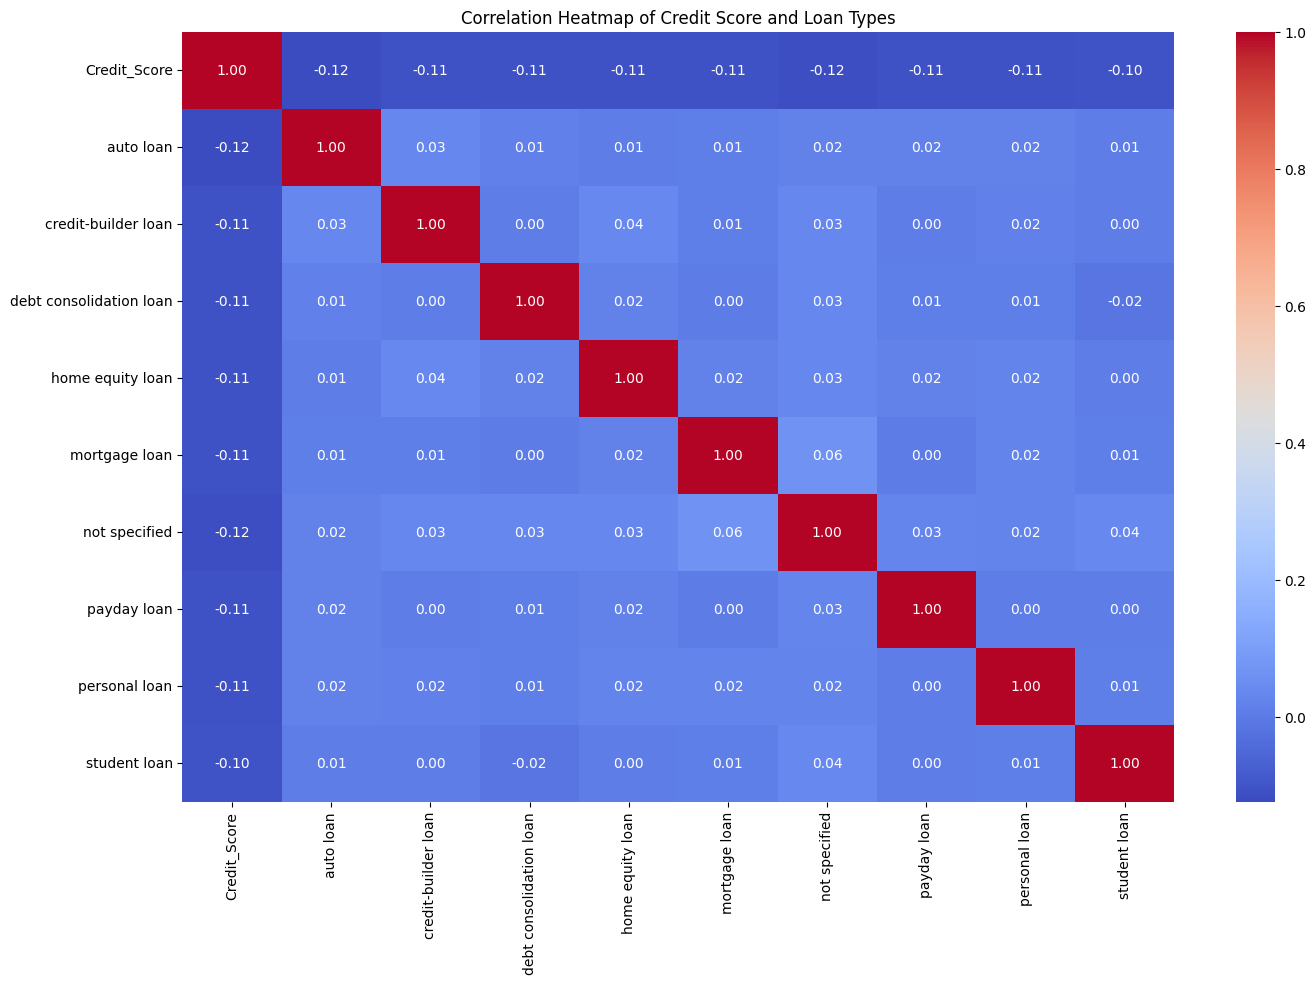

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(train_data_r_encoded[['Credit_Score'] + list(loan_dummies.columns)].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Credit Score and Loan Types')
plt.show()

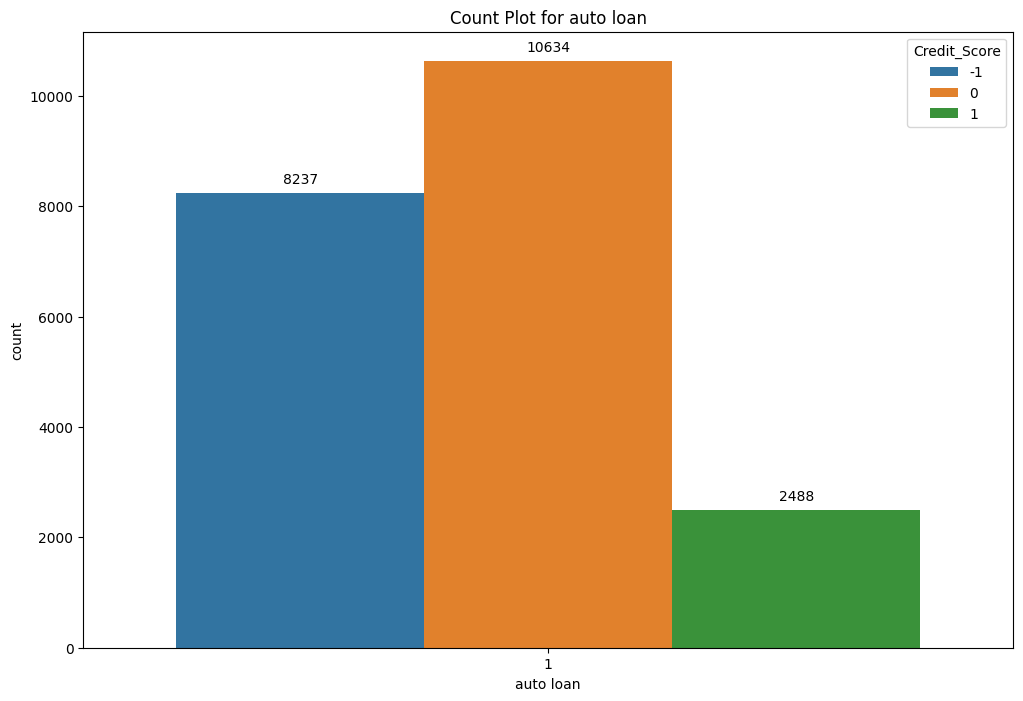

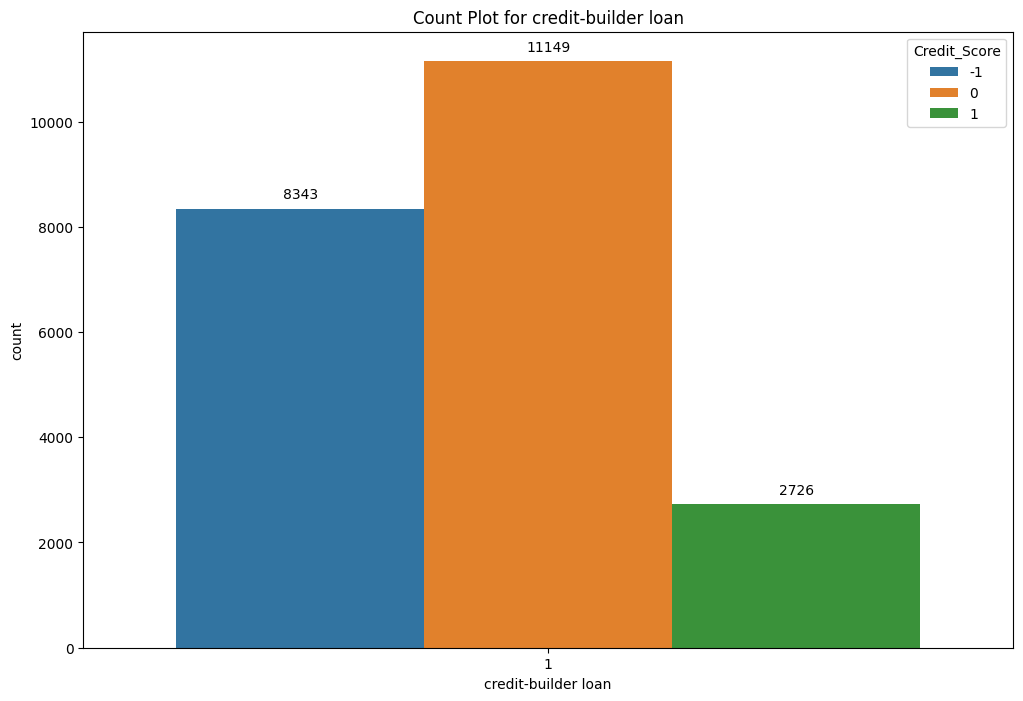

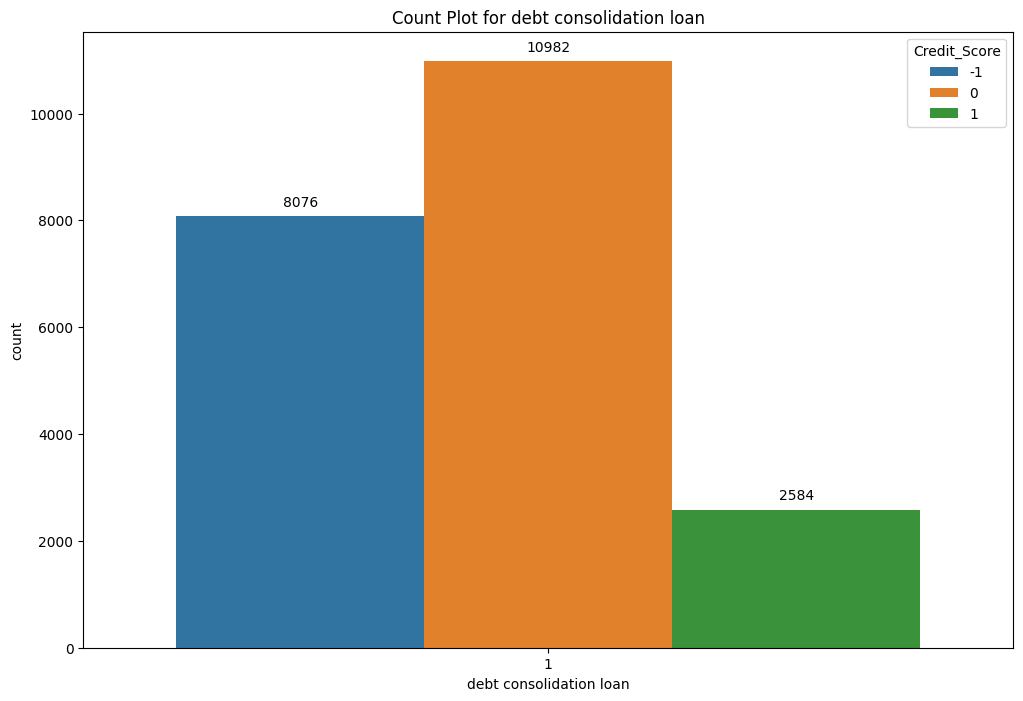

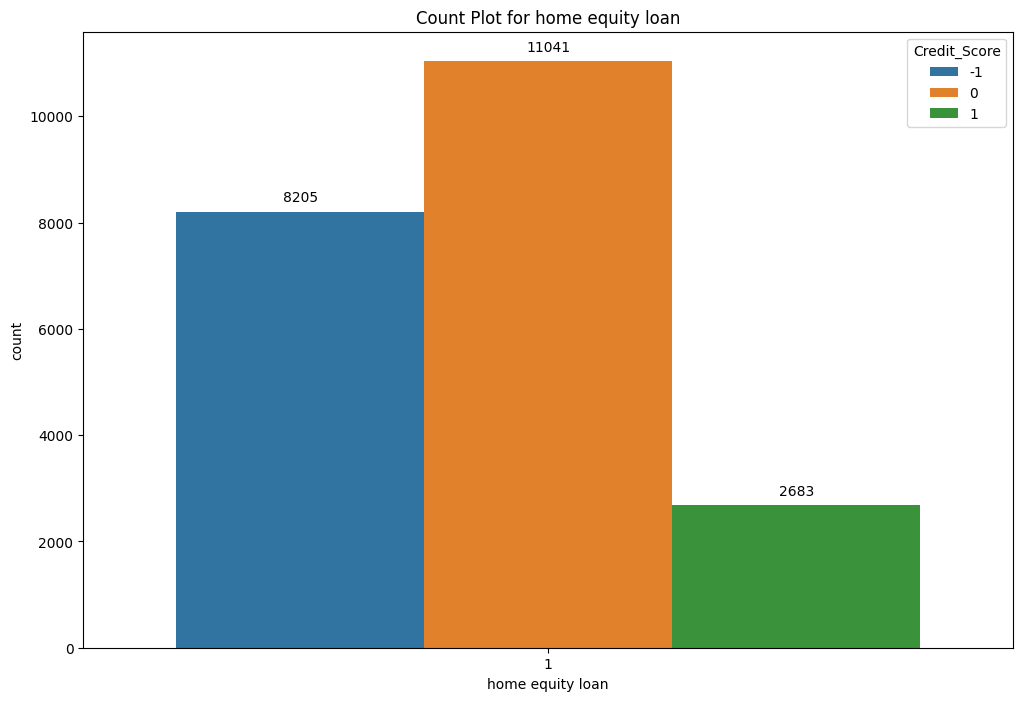

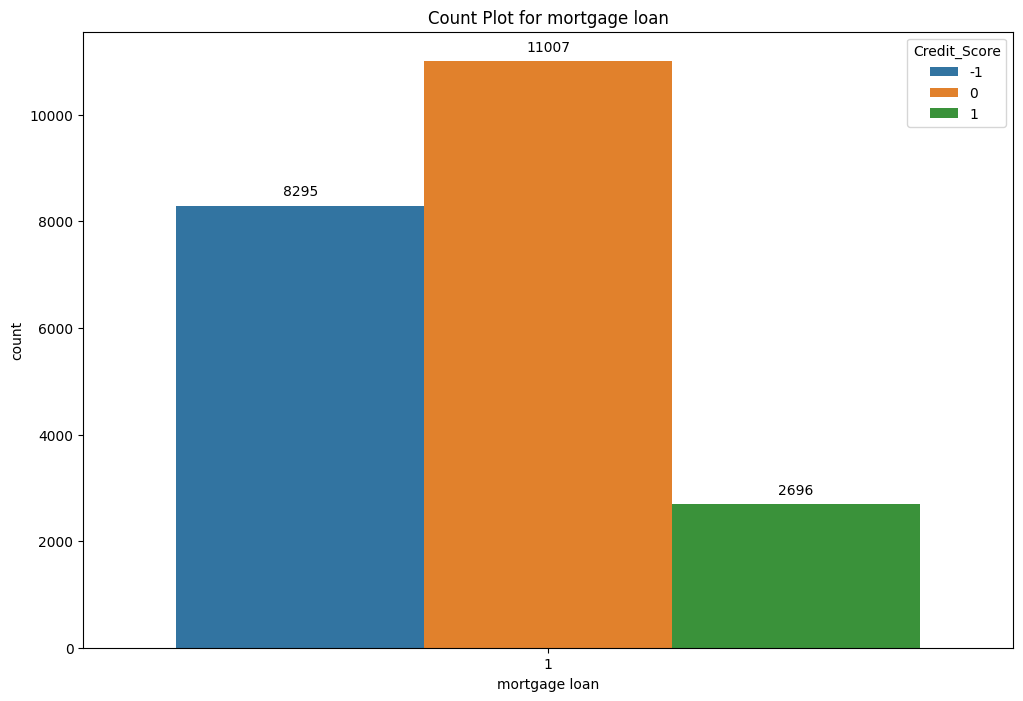

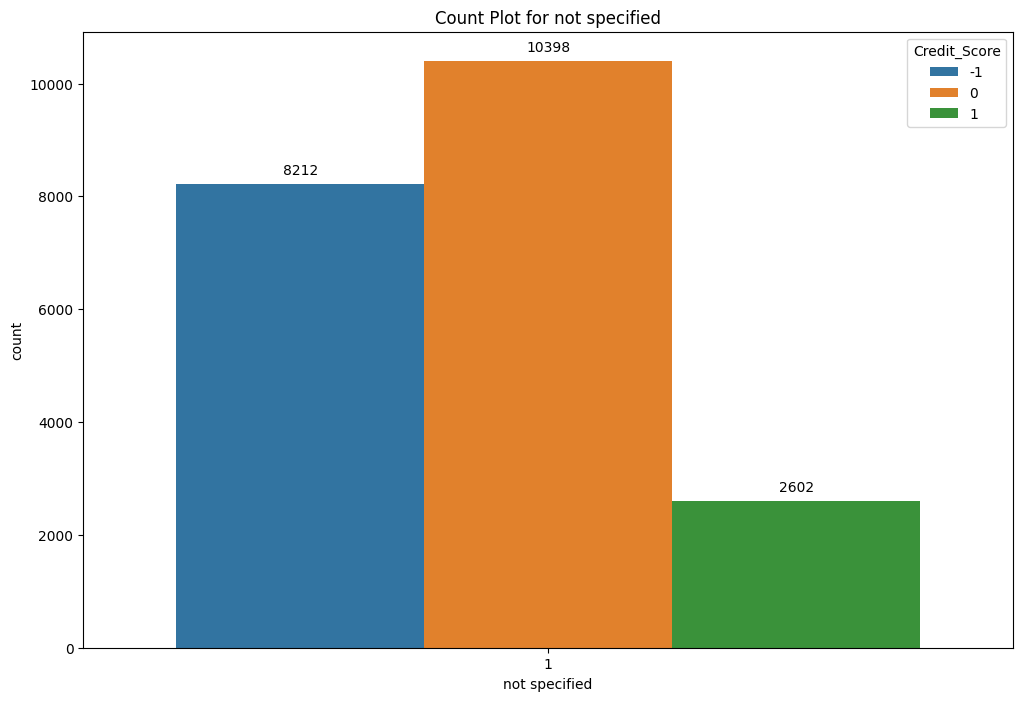

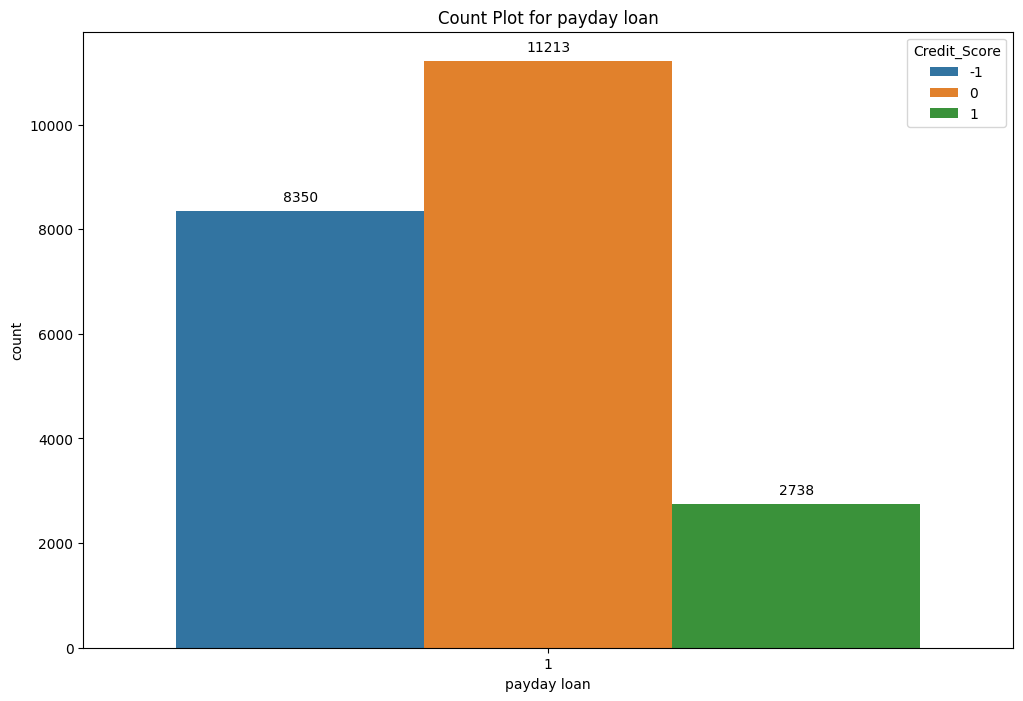

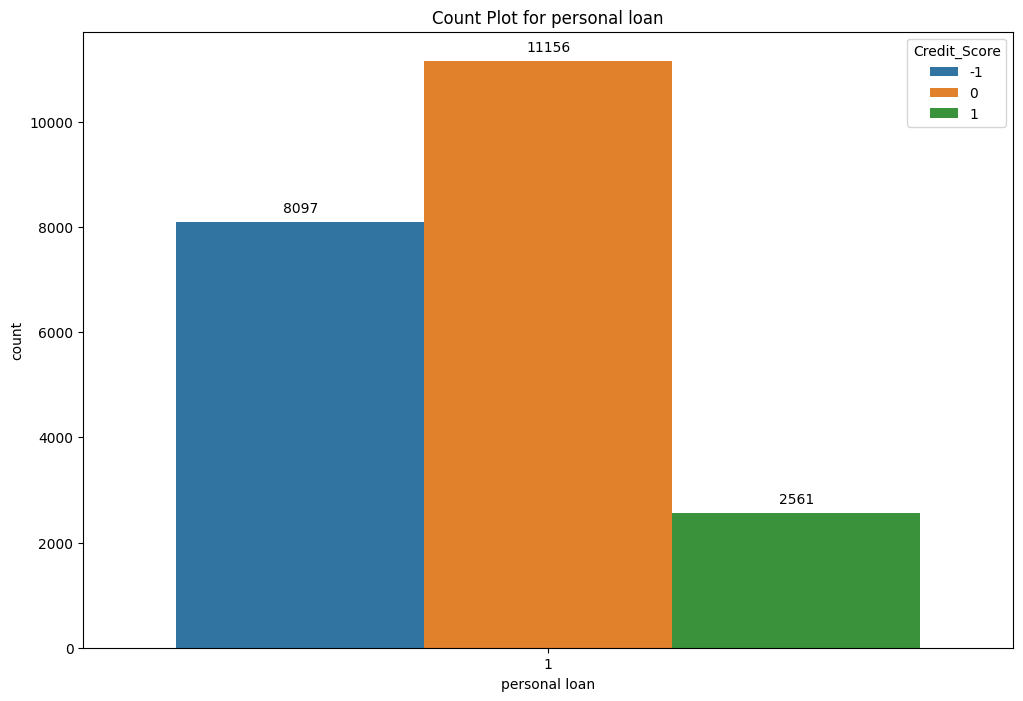

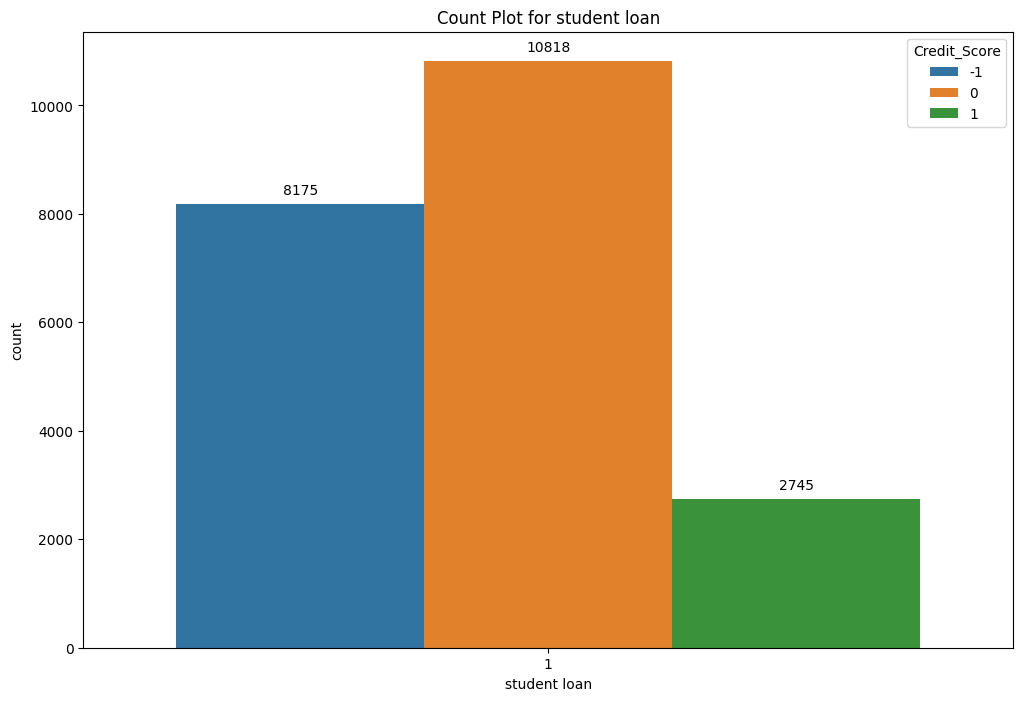

In [ ]:
for column in loan_dummies.columns:
    # Filter rows where the current column has a value of 1
    subset_data = train_data_r_encoded[train_data_r_encoded[column] == 1]

    # Create a count plot with hue on 'Credit_Score'
    plt.figure(figsize=(12, 8))
    ax = sns.countplot(x=column, hue='Credit_Score', data=subset_data)
    plt.title(f'Count Plot for {column}')

    # Annotate values on each bar
    for p in ax.patches:
        height = p.get_height() if not pd.isna(p.get_height()) else 0
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()

#### The heatmap and the count plot suggest that only the number of loans could provide any helpful information in the prediction of credit score as the type of the loan has almost smae correlation in the credit score and are equally distributed.

In [ ]:
columns_to_drop.append('Type_of_Loan')

In [ ]:
def plot_histplots_and_describe_for_each_credit_score(column_name):
    nan_count = train_data_r[column_name].isna().sum()
    print(f'Number of NaN values {nan_count}')
    print(train_data_r[column_name].describe())

    subset_train_data = train_data_r.dropna(subset = [column_name])

    sns.histplot(subset_train_data[column_name])
    plt.xticks(rotation=90)
    plt.show()

    for score in subset_train_data['Credit_Score'].unique():
        if pd.isna(score):
            continue
        plt.title(f'Impact of {column_name} on credit score {score}')
        subset = subset_train_data[subset_train_data['Credit_Score'] == score][column_name]
        plt.xticks(rotation=90)
        print(subset.describe())
        sns.histplot(subset, label=score)
        plt.show()


Number of NaN values 0
count    70000.000000
mean        21.059857
std         14.815379
min          0.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         62.000000
Name: Delay_from_due_date, dtype: float64


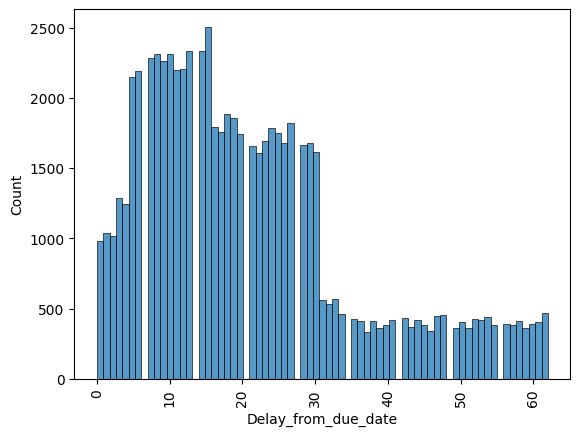

count    20399.000000
mean        29.701799
std         16.237213
min          0.000000
25%         17.000000
50%         27.000000
75%         43.000000
max         62.000000
Name: Delay_from_due_date, dtype: float64


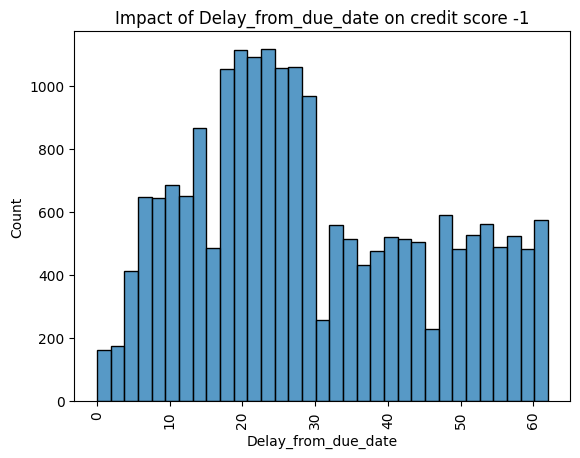

count    12521.000000
mean        10.908394
std          8.340152
min          0.000000
25%          5.000000
50%         10.000000
75%         14.000000
max         62.000000
Name: Delay_from_due_date, dtype: float64


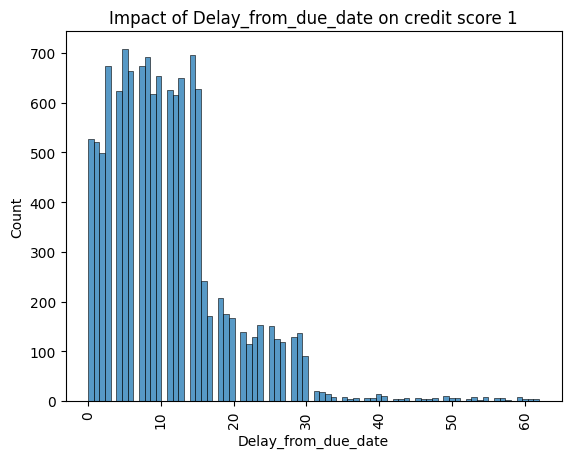

count    37080.000000
mean        19.733522
std         12.969221
min          0.000000
25%         10.000000
50%         18.000000
75%         26.000000
max         62.000000
Name: Delay_from_due_date, dtype: float64


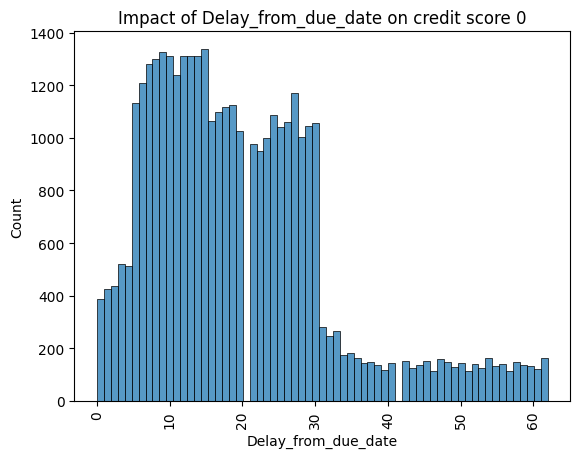

In [ ]:
#Lets check the distribution and correlation of Delay_from_due_date

plot_histplots_and_describe_for_each_credit_score('Delay_from_due_date')

#### There is definitely some pattern or dependence on the Delay_from_due_date column

Number of NaN values 0
count    70000.000000
mean        13.300557
std          6.230288
min          0.000000
25%          9.000000
50%         14.000000
75%         18.000000
max         25.000000
Name: Num_of_Delayed_Payment, dtype: float64


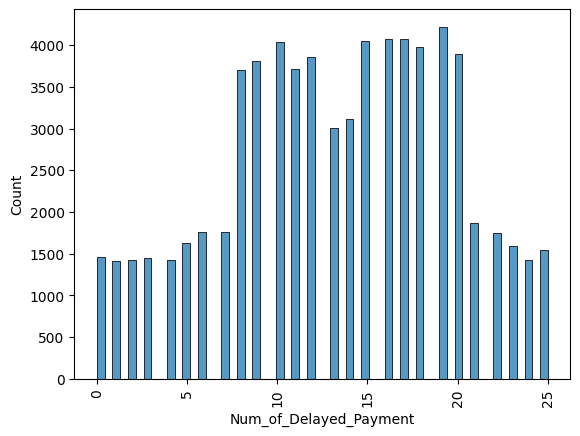

count    20399.000000
mean        15.807442
std          6.060112
min          0.000000
25%         12.000000
50%         17.000000
75%         20.000000
max         25.000000
Name: Num_of_Delayed_Payment, dtype: float64


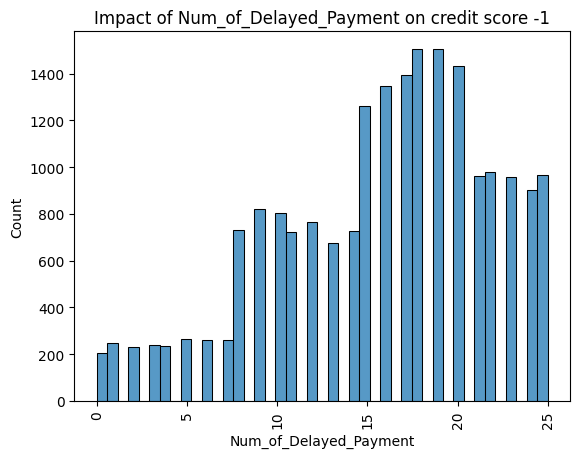

count    12521.000000
mean         8.558502
std          5.574126
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         25.000000
Name: Num_of_Delayed_Payment, dtype: float64


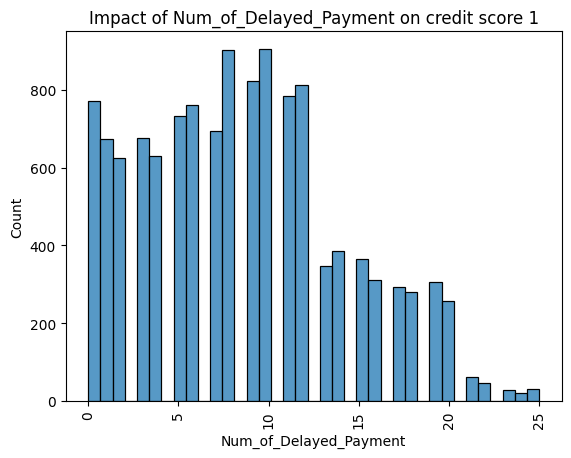

count    37080.000000
mean        13.522708
std          5.611084
min          0.000000
25%         10.000000
50%         14.000000
75%         18.000000
max         25.000000
Name: Num_of_Delayed_Payment, dtype: float64


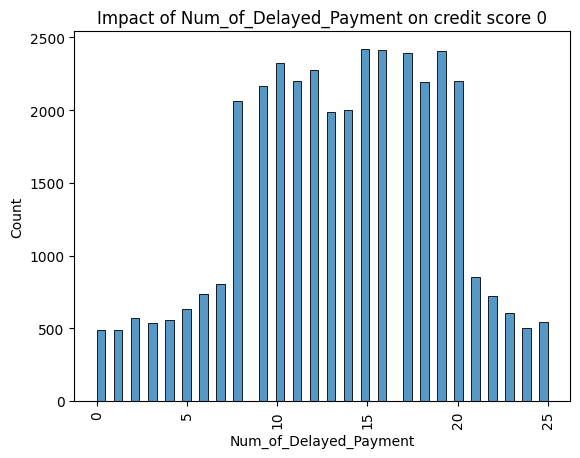

In [ ]:
# Lets check the dependence on Num_of_Delayed_Payment correlation

plot_histplots_and_describe_for_each_credit_score('Num_of_Delayed_Payment')

## Looks like there is difference in distribution of Deyal_from_due_date for different credit score

Number of NaN values 0
count    70000.000000
mean        10.490027
std          6.609701
min          0.500000
25%          5.400000
50%          9.410000
75%         14.900000
max         29.980000
Name: Changed_Credit_Limit, dtype: float64


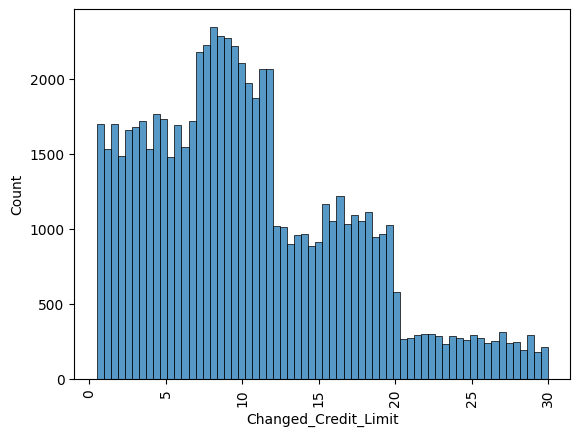

count    20399.000000
mean        11.137849
std          6.989723
min          0.500000
25%          5.725000
50%          9.730000
75%         16.140000
max         29.970000
Name: Changed_Credit_Limit, dtype: float64


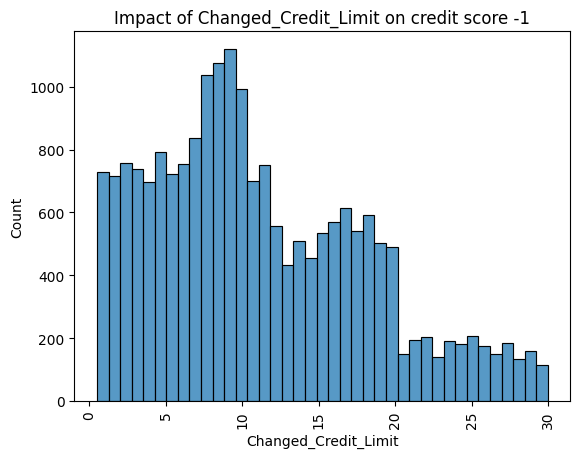

count    12521.000000
mean         7.239090
std          4.690426
min          0.500000
25%          3.620000
50%          6.730000
75%          9.940000
max         29.980000
Name: Changed_Credit_Limit, dtype: float64


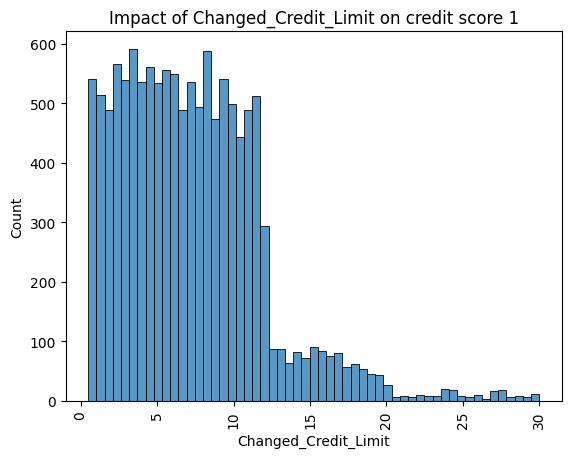

count    37080.000000
mean        11.231399
std          6.619758
min          0.500000
25%          6.410000
50%         10.320000
75%         15.860000
max         29.980000
Name: Changed_Credit_Limit, dtype: float64


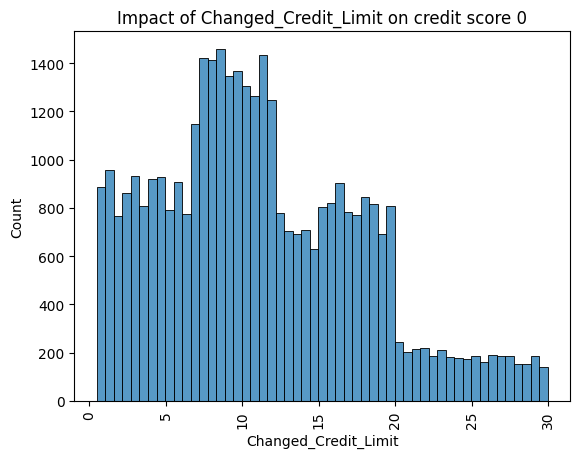

In [ ]:
# Lets check the distribution of 'Changed_Credit_Limit'

plot_histplots_and_describe_for_each_credit_score('Changed_Credit_Limit')

Number of NaN values 0
count    70000.000000
mean         5.802886
std          3.867851
min          0.000000
25%          3.000000
50%          5.000000
75%          9.000000
max         17.000000
Name: Num_Credit_Inquiries, dtype: float64


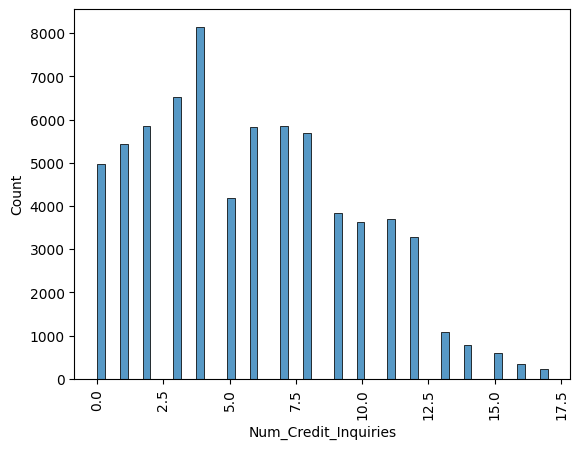

count    20399.000000
mean         8.177901
std          3.737458
min          0.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         17.000000
Name: Num_Credit_Inquiries, dtype: float64


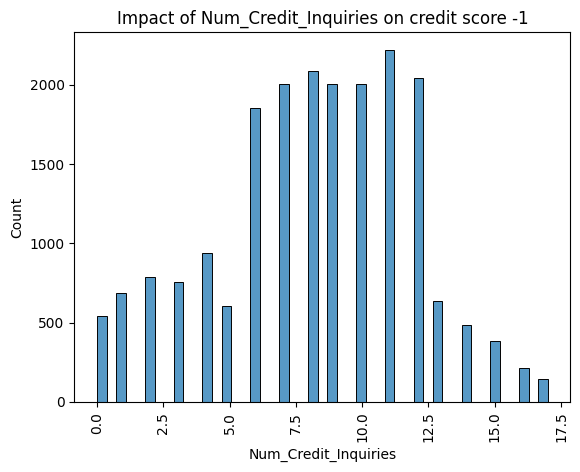

count    12521.000000
mean         3.306605
std          2.574046
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         17.000000
Name: Num_Credit_Inquiries, dtype: float64


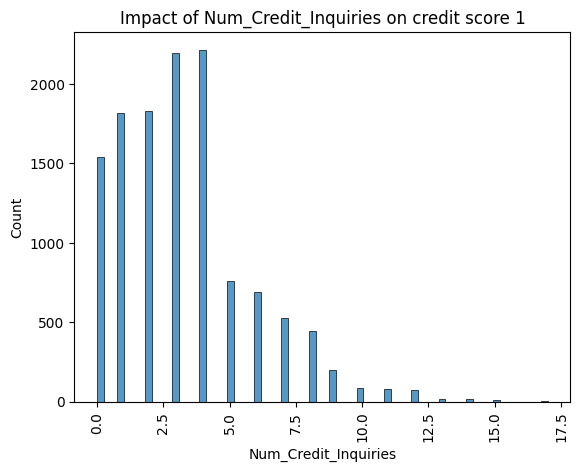

count    37080.000000
mean         5.339239
std          3.591434
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         17.000000
Name: Num_Credit_Inquiries, dtype: float64


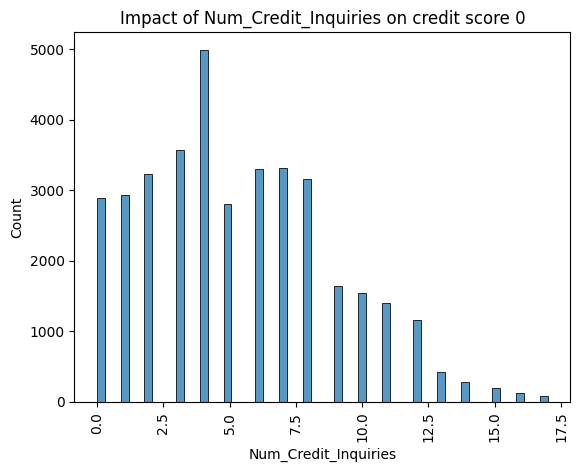

In [ ]:
# Checking the 'Num_Credit_Inquiries'

train_data_r['Num_Credit_Inquiries'] = train_data_r['Num_Credit_Inquiries'].astype('int')

plot_histplots_and_describe_for_each_credit_score('Num_Credit_Inquiries')

#### Num_Credit_Inquiries has impact on the target value

Number of NaN values 0
count        70000
unique           3
top       Standard
freq         32091
Name: Credit_Mix, dtype: object


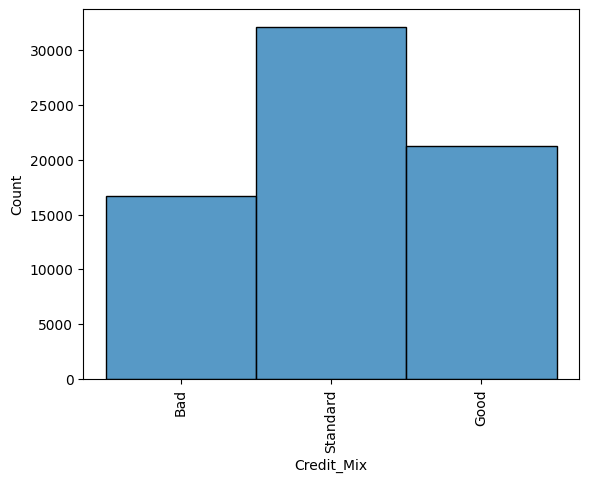

count     20399
unique        3
top         Bad
freq      10042
Name: Credit_Mix, dtype: object


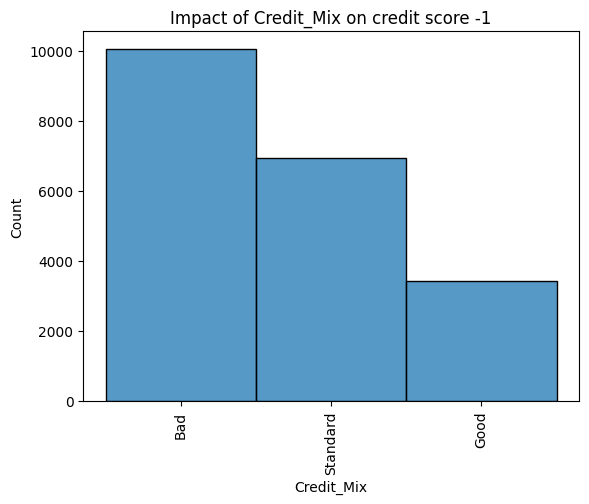

count     12521
unique        3
top        Good
freq      10438
Name: Credit_Mix, dtype: object


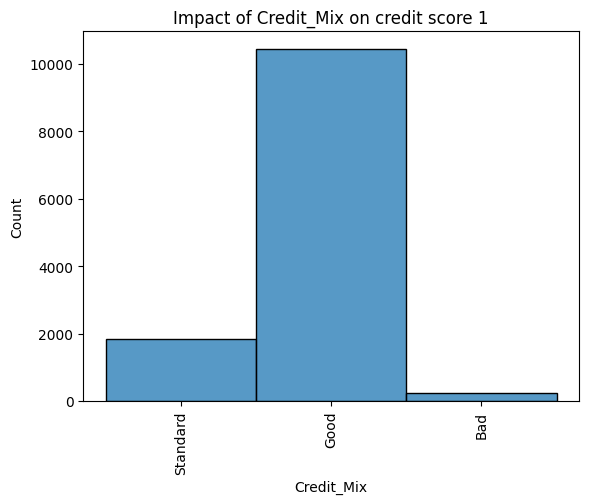

count        37080
unique           3
top       Standard
freq         23320
Name: Credit_Mix, dtype: object


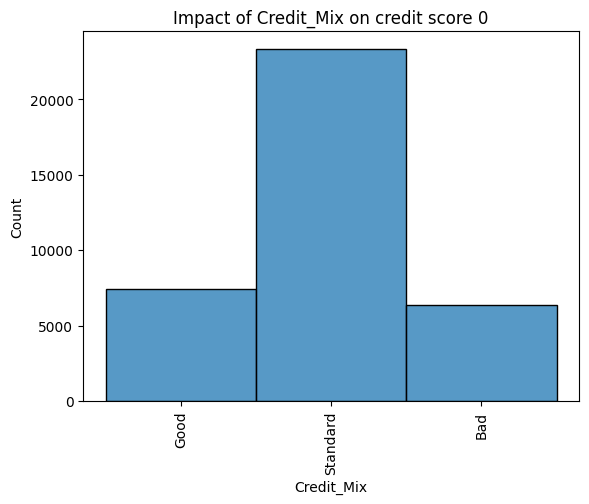

In [ ]:
# Checking for 'Credit_Mix'

plot_histplots_and_describe_for_each_credit_score('Credit_Mix')

#### It seems like Credit_Mix is a good indicator of good and standard Credit Score

Number of NaN values 0
count    70000.000000
mean      1426.611851
std       1155.679875
min          0.230000
25%        568.590000
50%       1164.700000
75%       1945.190000
max       4998.070000
Name: Outstanding_Debt, dtype: float64


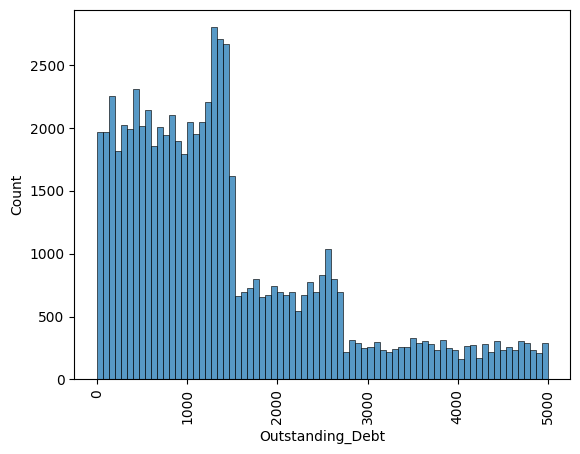

count    20399.000000
mean      2076.664605
std       1144.870576
min          0.540000
25%       1334.680000
50%       1935.650000
75%       2597.555000
max       4997.100000
Name: Outstanding_Debt, dtype: float64


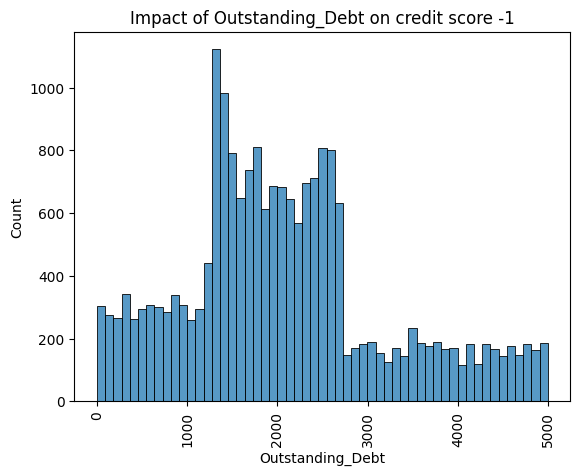

count    12521.000000
mean       798.520171
std        613.411895
min          0.230000
25%        381.300000
50%        733.560000
75%       1143.310000
max       4998.070000
Name: Outstanding_Debt, dtype: float64


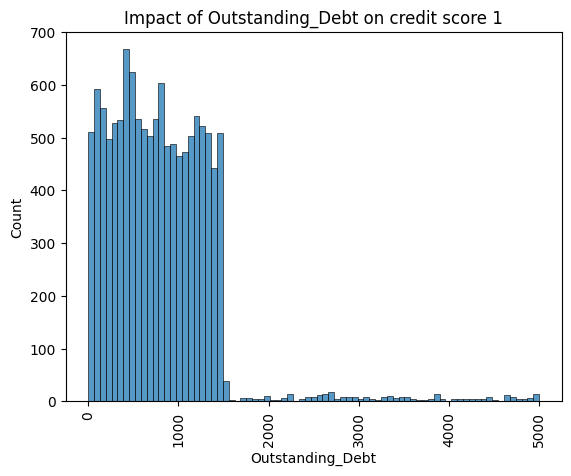

count    37080.000000
mean      1281.086225
std       1134.195655
min          0.230000
25%        494.295000
50%       1004.660000
75%       1455.730000
max       4998.070000
Name: Outstanding_Debt, dtype: float64


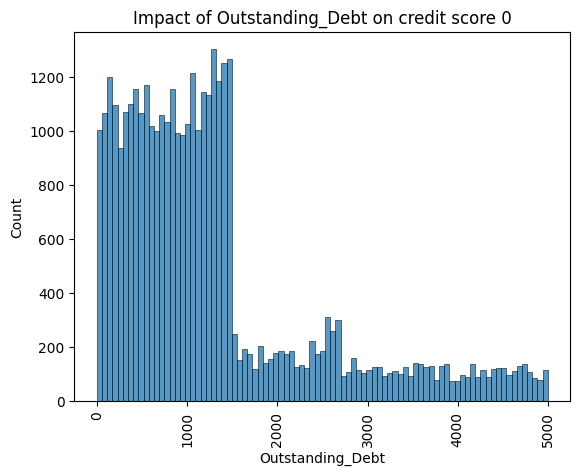

In [ ]:
# Lets check for 'Outstanding_Debt'

plot_histplots_and_describe_for_each_credit_score('Outstanding_Debt')

#### Outstanding debt is also a good indicator of Bad Credit Score

Number of NaN values 0
count    70000.000000
mean        32.285372
std          5.114936
min         20.000000
25%         28.028629
50%         32.330840
75%         36.485926
max         50.000000
Name: Credit_Utilization_Ratio, dtype: float64


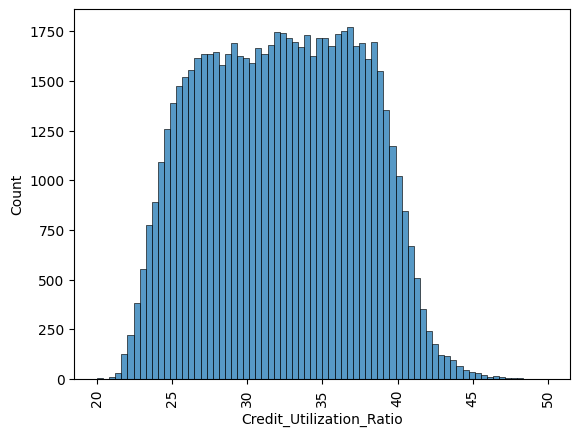

count    20399.000000
mean        31.992639
std          5.068370
min         20.172942
25%         27.744945
50%         32.051172
75%         36.222310
max         48.489852
Name: Credit_Utilization_Ratio, dtype: float64


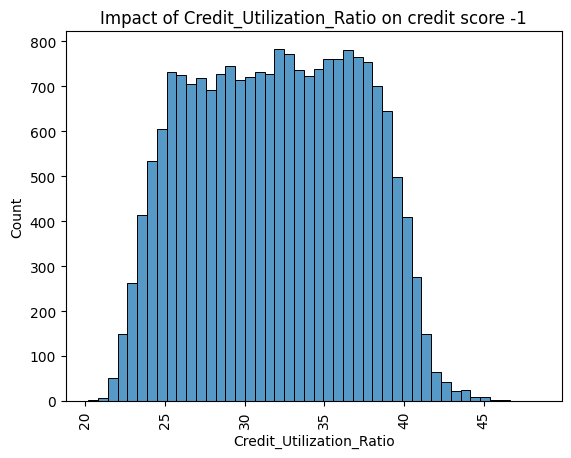

count    12521.000000
mean        32.663062
std          5.197833
min         20.257073
25%         28.396036
50%         32.752508
75%         36.858384
max         49.522324
Name: Credit_Utilization_Ratio, dtype: float64


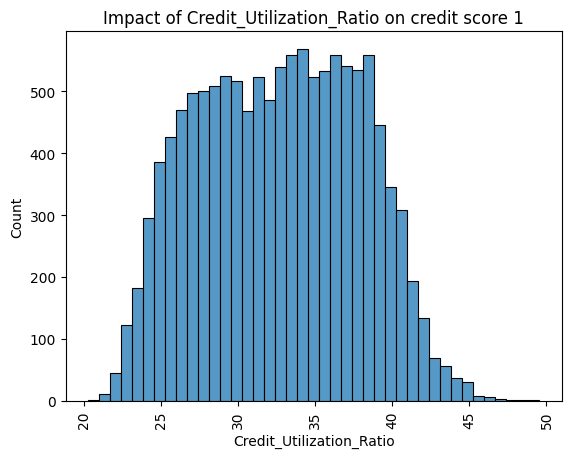

count    37080.000000
mean        32.318879
std          5.102915
min         20.000000
25%         28.063561
50%         32.344149
75%         36.494929
max         50.000000
Name: Credit_Utilization_Ratio, dtype: float64


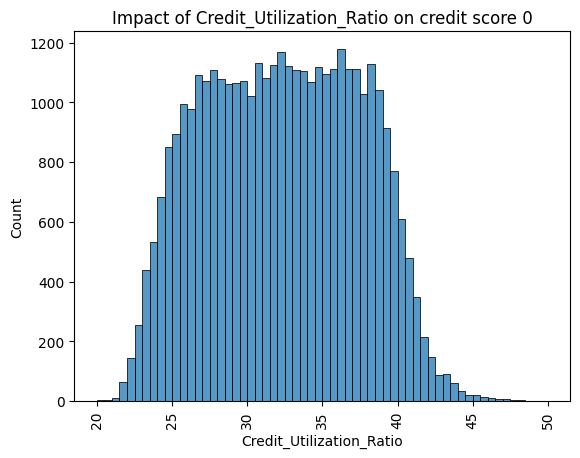

In [ ]:
# Lets check 'Credit_Utilization_Ratio'

plot_histplots_and_describe_for_each_credit_score('Credit_Utilization_Ratio')

#### Does not provide much impact on Credit_Score

In [ ]:
columns_to_drop.append('Credit_Score')

Number of NaN values 0
count    70000.000000
mean       221.020214
std         99.526463
min          1.000000
25%        144.000000
50%        219.000000
75%        301.000000
max        404.000000
Name: Credit_History_Age, dtype: float64


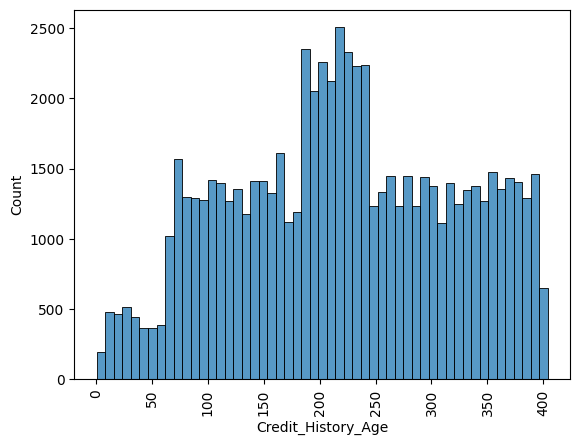

count    20399.000000
mean       170.162067
std         87.468008
min          2.000000
25%        104.000000
50%        161.000000
75%        222.000000
max        404.000000
Name: Credit_History_Age, dtype: float64


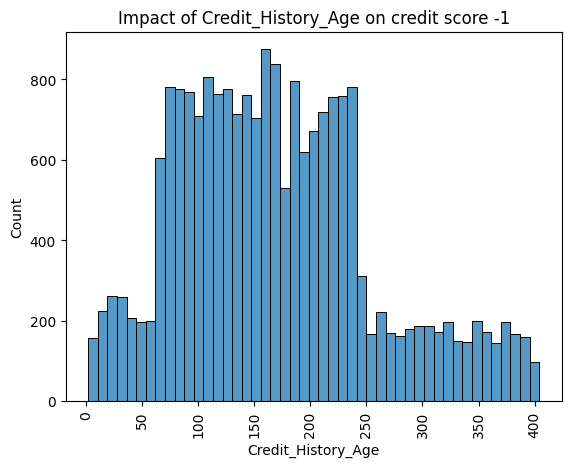

count    12521.000000
mean       284.287916
std         73.219459
min          7.000000
25%        230.000000
50%        288.000000
75%        345.000000
max        404.000000
Name: Credit_History_Age, dtype: float64


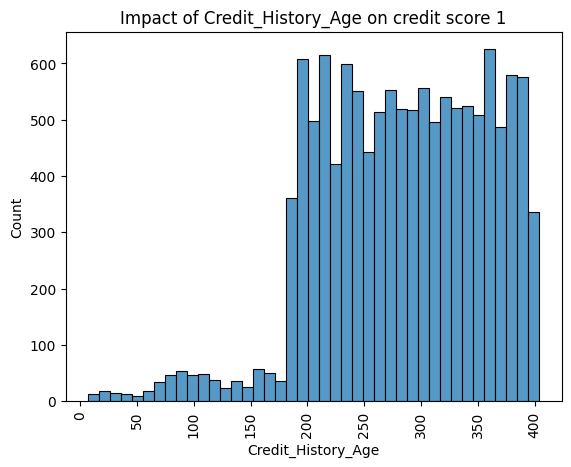

count    37080.000000
mean       227.635113
std         99.310276
min          1.000000
25%        154.000000
50%        227.000000
75%        310.000000
max        404.000000
Name: Credit_History_Age, dtype: float64


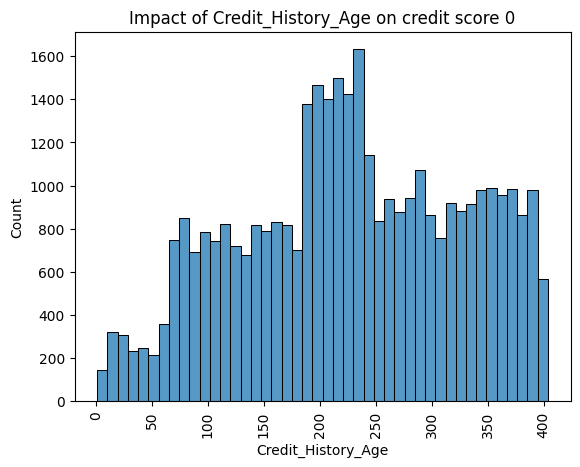

In [ ]:
# Lets check 'Credit_History_Age'

plot_histplots_and_describe_for_each_credit_score('Credit_History_Age')

#### 'Credit_History_Age' provides some differences in data distribution for 'Good' and 'Bad' Credit Score

Number of NaN values 0
count     70000
unique        3
top         Yes
freq      36688
Name: Payment_of_Min_Amount, dtype: object


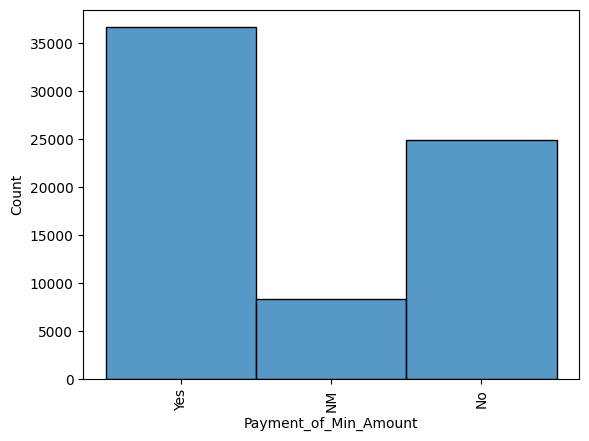

count     20399
unique        3
top         Yes
freq      14570
Name: Payment_of_Min_Amount, dtype: object


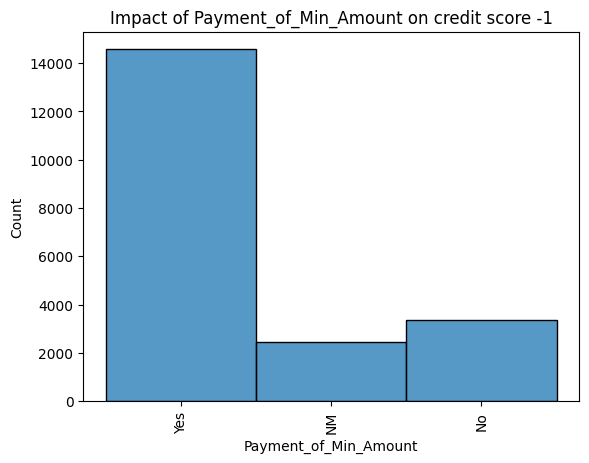

count     12521
unique        3
top          No
freq       9632
Name: Payment_of_Min_Amount, dtype: object


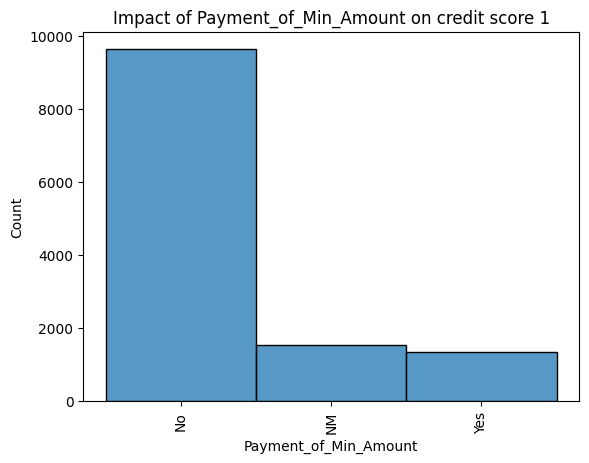

count     37080
unique        3
top         Yes
freq      20775
Name: Payment_of_Min_Amount, dtype: object


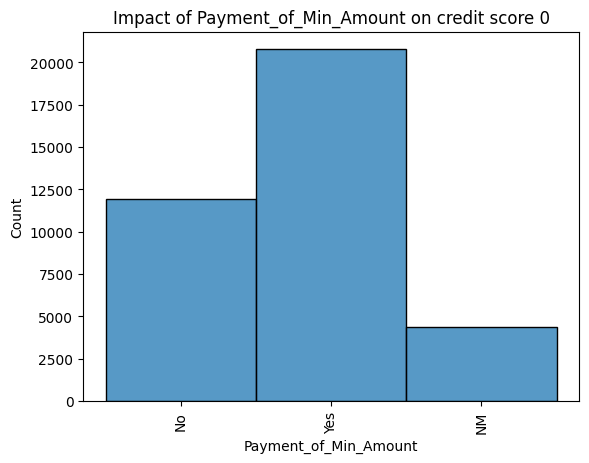

In [ ]:
# Lets check for 'Payment_of_Min_Amount'

plot_histplots_and_describe_for_each_credit_score('Payment_of_Min_Amount')

#### 'Payment_of_Min_Amount' is differently distributed for 'Good' & 'Bad' Credit Score. But it needs to be cleaned of 'NM' values


In [197]:
columns_to_modify = []
columns_to_modify.append("Payment_of_Min_Amount")

Number of NaN values 0
count    70000.000000
mean       107.425309
std        130.888479
min          0.000000
25%         29.294017
50%         66.378401
75%        147.220773
max       1779.103254
Name: Total_EMI_per_month, dtype: float64


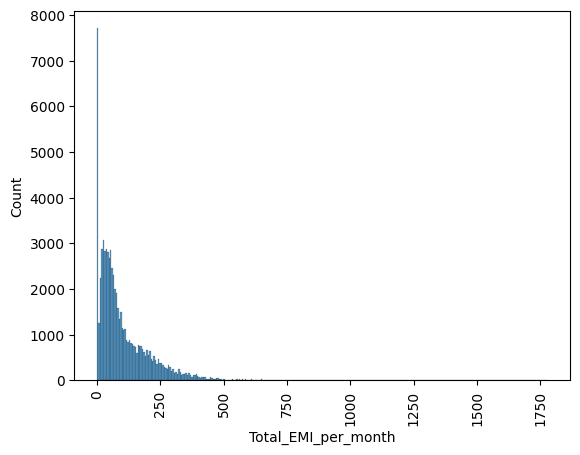

count    20399.000000
mean       110.513482
std        104.289663
min          0.000000
25%         39.476011
50%         74.454215
75%        155.969794
max       1745.000000
Name: Total_EMI_per_month, dtype: float64


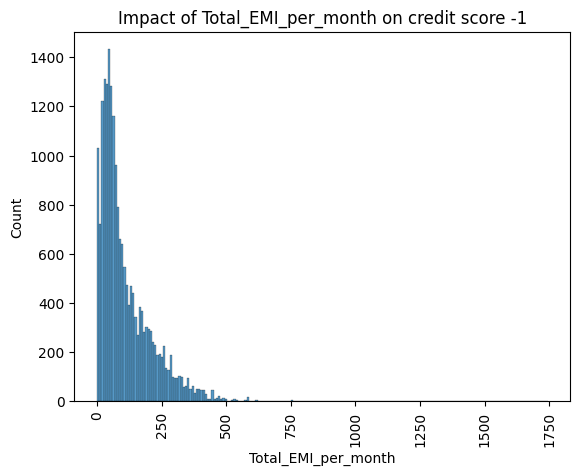

count    12521.000000
mean       121.460193
std        185.786234
min          0.000000
25%         20.644248
50%         61.041768
75%        154.397390
max       1779.103254
Name: Total_EMI_per_month, dtype: float64


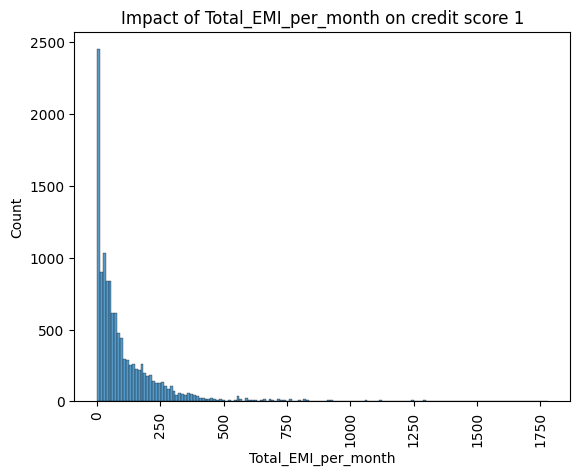

count    37080.000000
mean       100.987164
std        120.791933
min          0.000000
25%         26.554561
50%         62.741679
75%        139.940385
max       1775.000000
Name: Total_EMI_per_month, dtype: float64


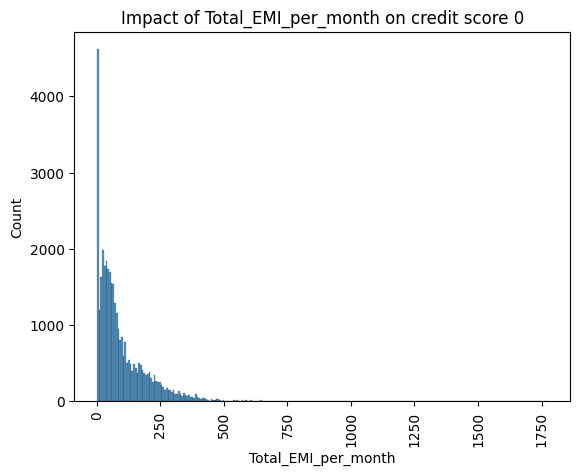

In [ ]:
# Lets check for 'Total_EMI_per_month'

plot_histplots_and_describe_for_each_credit_score('Total_EMI_per_month')

#### 'Total_EMI_per_month' provides no real information about the data

In [ ]:
columns_to_drop.append('Total_EMI_per_month')

Number of NaN values 0
count    70000.000000
mean        55.120294
std         39.045155
min          0.000000
25%         28.027069
50%         45.127125
75%         71.175522
max        434.191089
Name: Amount_invested_monthly, dtype: float64


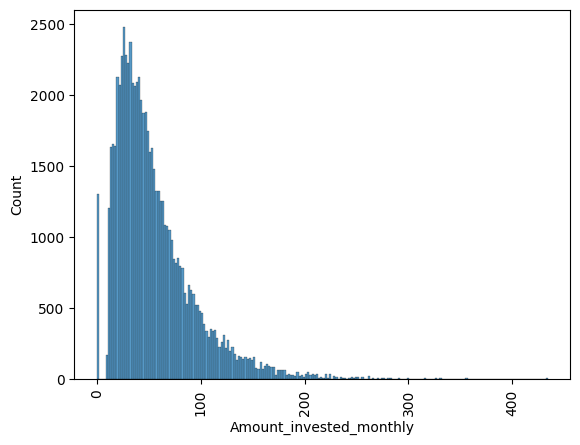

count    20399.000000
mean        46.993223
std         32.354480
min          0.000000
25%         24.968845
50%         40.286764
75%         61.143081
max        330.618021
Name: Amount_invested_monthly, dtype: float64


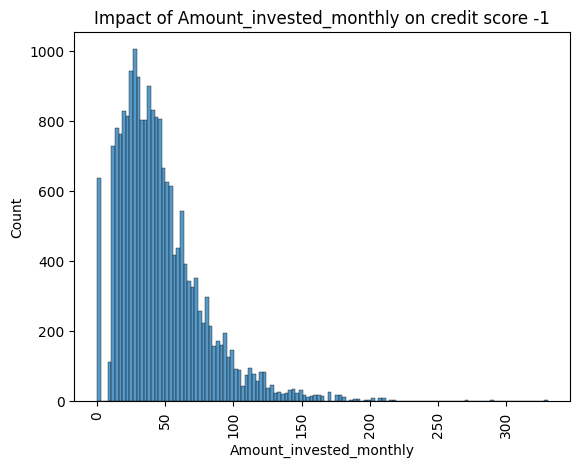

count    12521.000000
mean        67.503198
std         45.451724
min          0.000000
25%         33.705312
50%         55.901305
75%         88.790007
max        356.550361
Name: Amount_invested_monthly, dtype: float64


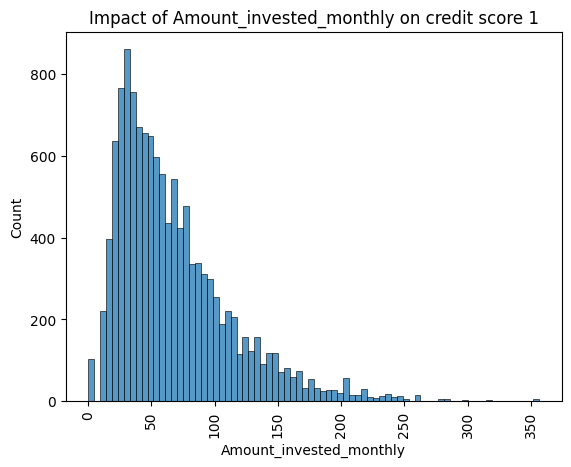

count    37080.000000
mean        55.409878
std         38.941244
min          0.000000
25%         28.151906
50%         45.282527
75%         71.430604
max        434.191089
Name: Amount_invested_monthly, dtype: float64


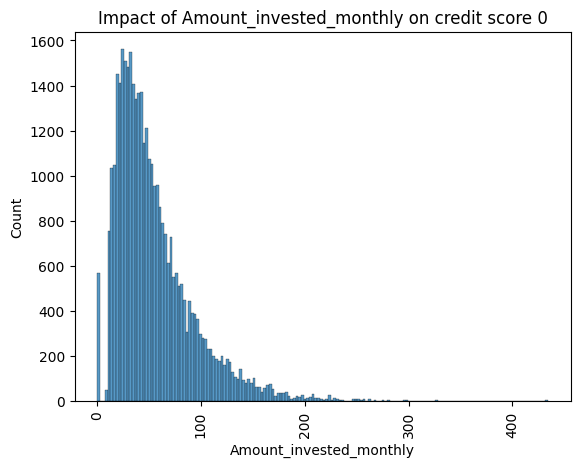

In [ ]:
# Lets check 'Amount_invested_monthly'

plot_histplots_and_describe_for_each_credit_score('Amount_invested_monthly')

#### Although there is a defference in medain values it not significantly high evidence for impact on Credit_Score

Number of NaN values 0
count                              70000
unique                                 6
top       Low_spent_Small_value_payments
freq                               20075
Name: Payment_Behaviour, dtype: object


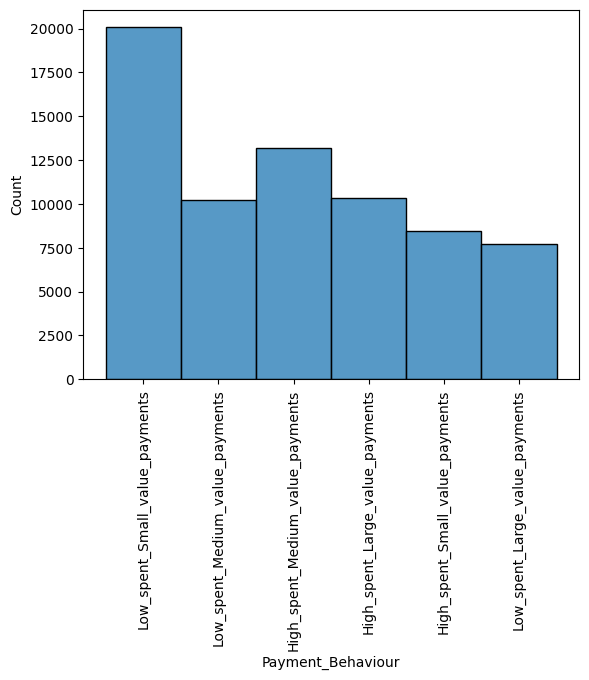

count                              20399
unique                                 6
top       Low_spent_Small_value_payments
freq                                7230
Name: Payment_Behaviour, dtype: object


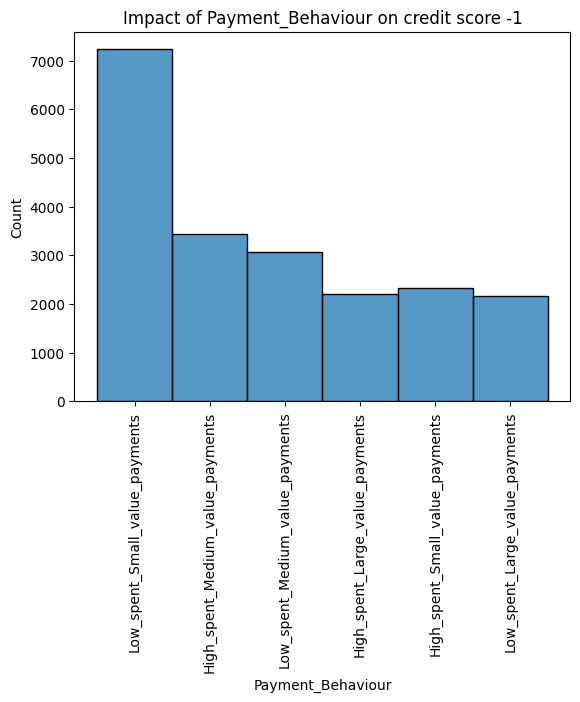

count                                12521
unique                                   6
top       High_spent_Medium_value_payments
freq                                  2649
Name: Payment_Behaviour, dtype: object


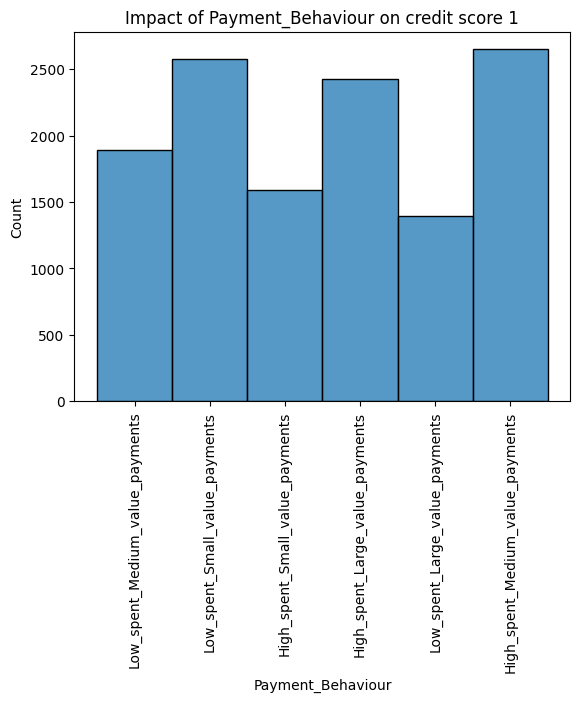

count                              37080
unique                                 6
top       Low_spent_Small_value_payments
freq                               10269
Name: Payment_Behaviour, dtype: object


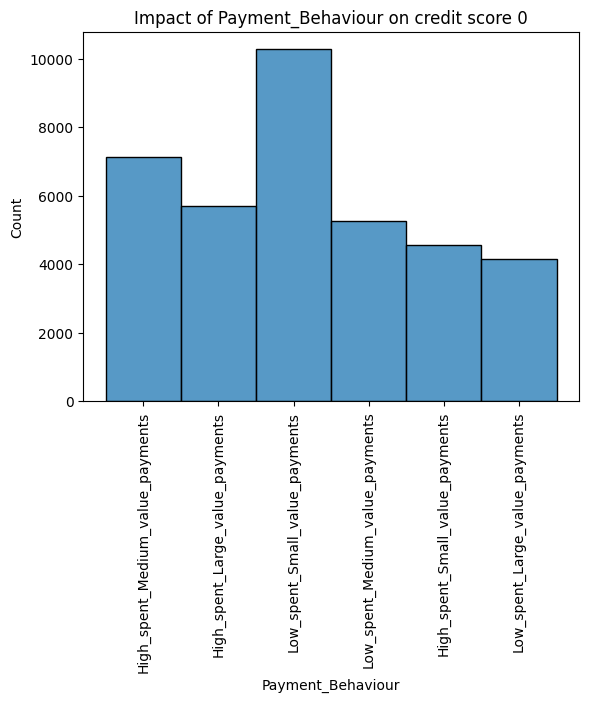

In [ ]:
# Lets check for 'Payment_Behaviour'

plot_histplots_and_describe_for_each_credit_score('Payment_Behaviour')

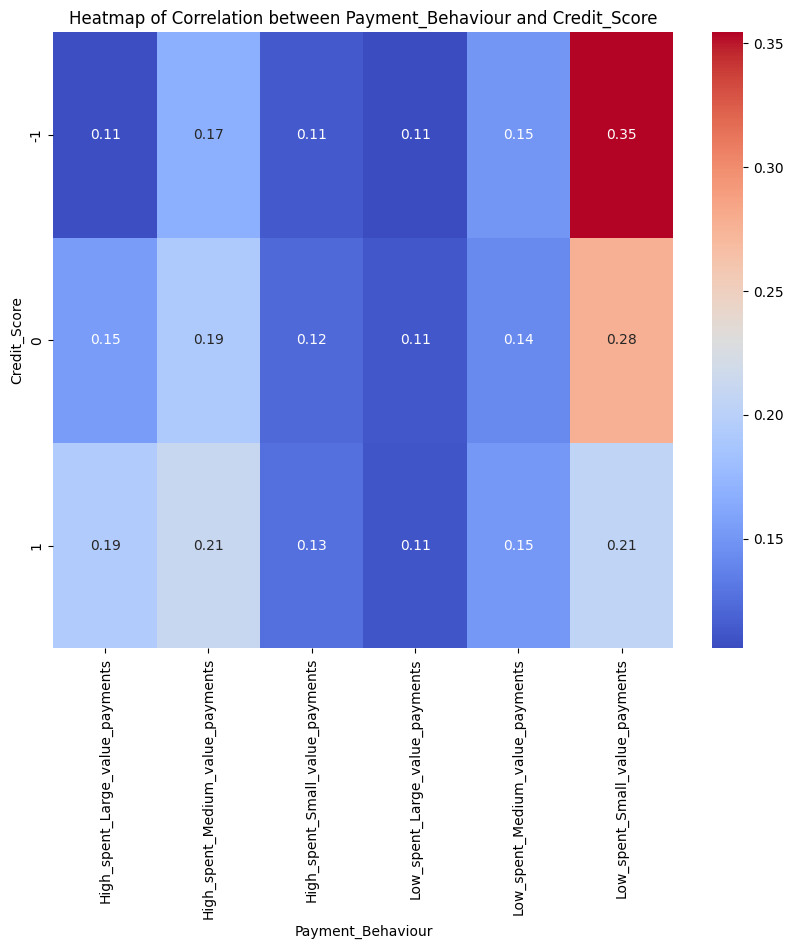

In [194]:
# The histograms do not provide useful information, so lets plot a heatmap

categorical_column = 'Payment_Behaviour'
categorical_target = 'Credit_Score'

cross_tab = pd.crosstab(train_data_r[categorical_target], train_data_r[categorical_column], normalize='index')

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation between {} and {}'.format(categorical_column, categorical_target))
plt.show()


#### 'Payment_Behaviour' seems to provide information for the target value

Number of NaN values 0
count    70000.000000
mean       392.625242
std        202.251999
min          0.007760
25%        267.391375
50%        333.179018
75%        463.411588
max       1183.930696
Name: Monthly_Balance, dtype: float64


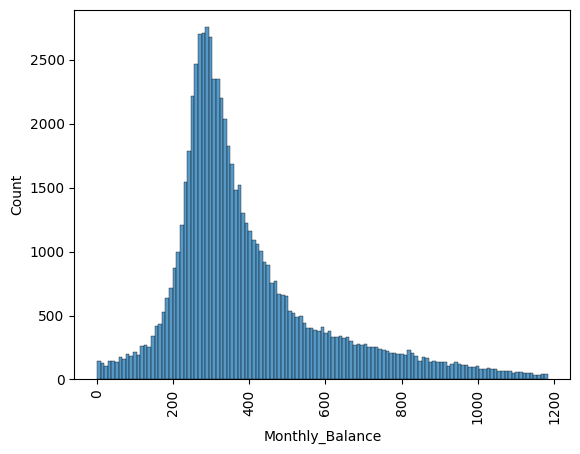

count    20399.000000
mean       339.114622
std        166.447349
min          0.088628
25%        250.650587
50%        297.835624
75%        384.005417
max       1182.121691
Name: Monthly_Balance, dtype: float64


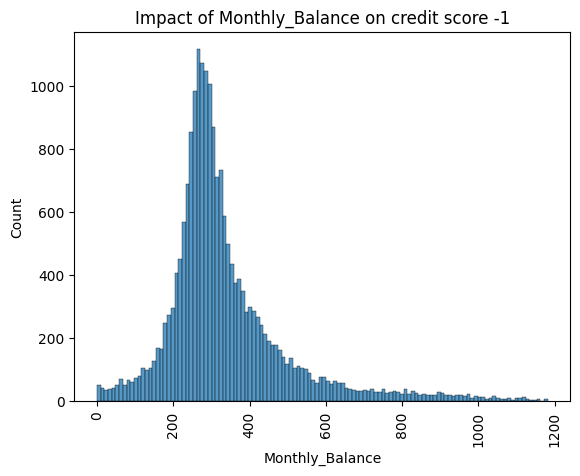

count    12521.000000
mean       457.582535
std        229.228798
min          0.007760
25%        302.507854
50%        393.929015
75%        575.897331
max       1183.930696
Name: Monthly_Balance, dtype: float64


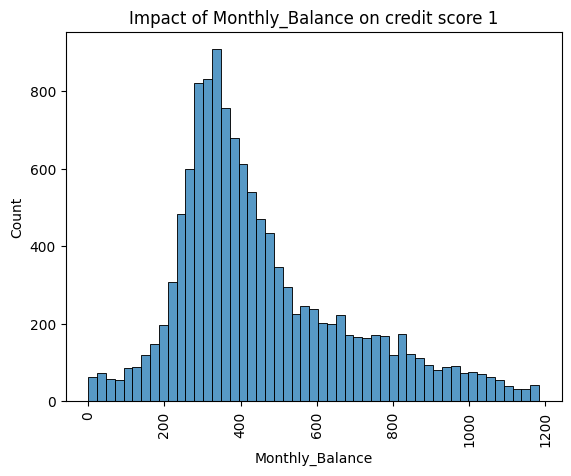

count    37080.000000
mean       400.128825
std        202.937353
min          0.103402
25%        271.664146
50%        340.218711
75%        476.060434
max       1183.930696
Name: Monthly_Balance, dtype: float64


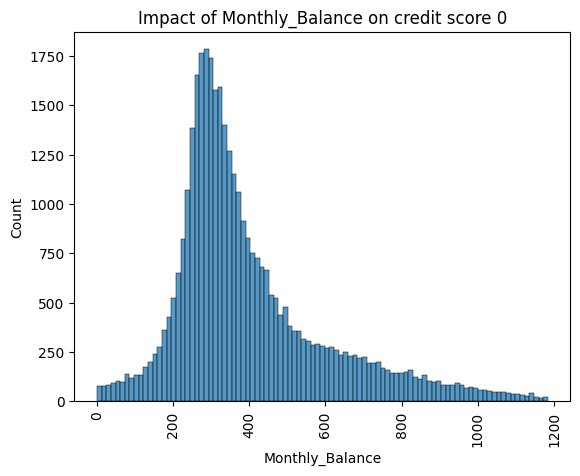

In [195]:
# lets check for 'Monthly_Balance'

plot_histplots_and_describe_for_each_credit_score('Monthly_Balance')

#### Mpnthly_Balance does not seem to provide any relevant information on the target value


In [196]:
print(columns_to_drop)
print(columns_to_modify)

['ID', 'Customer_ID', 'Name', 'SSN', 'Month', 'Occupation', 'Type_of_Loan', 'Credit_Score', 'Total_EMI_per_month']
